# Wrangling Project - WeRateDogs
### Table of Contents
<ul>
<li><a href="#gather">Gather Phase</a></li>
<li><a href="#assess">Assess Phase</a></li>
<li><a href="#clean">Clean Phase</a></li>
<li><a href="#aa">Analyzing & Visualizing</a></li>
    
</ul>

In [35]:
import pandas as pd
import requests
import os
import json
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np


<a id='gather'></a>
# Gathering

In [36]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [37]:
df.shape

(2356, 17)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [39]:
open('image_pred.txt', 'a').close()

In [40]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
res = requests.get(url)
with open('image_pred.txt', mode='wb') as f:
    f.write(res.content)

335079

### Twitter API

In [41]:
import tweepy

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [42]:
open('tweet_json.txt', 'a').close()

In [43]:
fails_tweets = {}
count = 0
start = timer()
with open('tweet_json.txt', mode='w') as outfile:
    for tweet_id in df.tweet_id.values:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            #The Status object of tweepy itself is not JSON serializable, 
            #but it has a _json property which contains JSON serializable response data.
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_tweets[tweet_id] = e
            pass
end = timer()
print(end - start)
#print(fails_tweets)

ref: 
https://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data

In [45]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [46]:
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [47]:
df_list = []
for tweet in tweets:
    tweet_id = tweet['id']
    retweets = tweet['retweet_count']
    favorites = tweet['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})

In [48]:
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df

,tweet_id,retweets,favorites
0,892420643555336193,7889,36980
1,892177421306343426,5859,31825
2,891815181378084864,3866,23973
3,891689557279858688,8057,40307
4,891327558926688256,8716,38504
5,891087950875897856,2900,19365
6,890971913173991426,1916,11285
7,890729181411237888,17605,62383
8,890609185150312448,3997,26649
9,890240255349198849,6856,30512


In [49]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id     2333 non-null int64
retweets     2333 non-null int64
favorites    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [50]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [51]:
df = df.merge(tweets_df,on='tweet_id')

In [52]:
image_pred = pd.read_csv('image_pred.txt',sep='\t')

<a id='assess'></a>
# Assessing 

### Quality Issues
- drop unneeded columns
    - drop in_reply_to_status_id column
    - drop in_reply_to_user_id column
    - drop retweeted_status_id column
    - drop retweeted_status_user_id column
    - drop retweeted_status_timestamp column
    - drop source of the tweet (sent from iphone, andriod...)
    -  drop expanded_urls
- drop rows with value of False in all p1_dog, p2_dog and p3_dog. (Not dogs by three predictions)
- timestamp should be datetime object
- remove retweeted tweets
- remove replies tweets
- check the name column; strange inputs such as 'a', 'an', 'quite','the', 'my' ,'light', 'actually', and 'one'

### Tidiness Issues
- Multipliy stage variables, should be one column as 'stage'
- stage should be categorical variable.


In [53]:
# only 2075 rows vs. original df which has 2356. -> drop these extra rows
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
#lets check if the conf is between 0 and 1.
image_pred[image_pred.p1_conf > 1].sum().tweet_id
image_pred[image_pred.p2_conf > 1].sum().tweet_id
image_pred[image_pred.p3_conf > 1].sum().tweet_id

0.0

0.0

0.0

In [55]:
#lets check if the conf is between 0 and 1.
image_pred[image_pred.p1_conf < 0].sum().tweet_id
image_pred[image_pred.p2_conf < 0].sum().tweet_id
image_pred[image_pred.p3_conf < 0].sum().tweet_id

0.0

0.0

0.0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2332
Data columns (total 19 columns):
tweet_id                      2333 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
retweets                      23

In [57]:
df[df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites


In [58]:
#check the timestamp type -> change to datetime.
type(df.timestamp[0])

str

In [59]:
# unclear what to do with this 
df.rating_denominator.unique()
df.rating_numerator.unique()

array([ 10,   0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [60]:
# check if there duplicated urls (tweet).
len(df.expanded_urls.unique()) == len(df.expanded_urls)

False

In [61]:
#this all replies tweets. which we dont really want. -> drop rows.
df[~df.in_reply_to_status_id.isnull()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites
29,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,4,115
54,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,7,121
63,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,10,300


In [62]:
#this all retweeted tweets. which we dont really want. -> drop rows.
df[~df.retweeted_status_id.isnull()].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites
31,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None,101,0
35,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None,17304,0
67,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None,6365,0


In [63]:
# check the name column; strange inputs such as 'a', 'an', 'quite' and 'the', 'my' ,'light', 'actually', 'one'
# all have one thing incommen they all start with lower-case letter -> do regx to deal with them.
df[df.name.str.contains('^[a-z]')].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [64]:
#tidy problem is having [doggo	floofer	pupper	puppo] -> one variable 'stage'
# also some dogs have more than one stage.
# and some habe no stage.
df.query("doggo == 'None' & floofer == 'None' & pupper == 'None' & puppo == 'None'").shape

(1957, 19)

In [65]:
df.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [66]:
df.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [67]:
df.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [68]:
df.puppo.unique()
df.name.unique()

array(['None', 'puppo'], dtype=object)

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo',
       'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',
 

<a id='clean'></a>

# Cleaning

In [69]:
df_clean = df.copy()

In [70]:
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo',
       'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle',
 

In [71]:
# remove replies
df_clean.drop(df_clean[~df_clean.in_reply_to_status_id.isnull()].index, inplace=True)

In [72]:
#checking
df_clean[~df_clean.in_reply_to_user_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites


In [73]:
# remove retweets
df_clean.drop(df_clean[~df_clean.retweeted_status_id.isnull()].index, inplace=True)

In [74]:
#checking
df_clean[~df_clean.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,favorites


In [75]:
df_clean = df_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'
                      ,'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','source'],axis=1)

In [76]:
df_clean.shape

(2090, 13)

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2332
Data columns (total 13 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null object
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  2090 non-null object
doggo                 2090 non-null object
floofer               2090 non-null object
pupper                2090 non-null object
puppo                 2090 non-null object
retweets              2090 non-null int64
favorites             2090 non-null int64
dtypes: int64(5), object(8)
memory usage: 228.6+ KB


In [78]:
# change timestamp from string to datetime.
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [79]:
# checking
type(df_clean.timestamp[0])
df_clean.name.unique()

pandas._libs.tslibs.timestamps.Timestamp

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Ho

In [80]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites'],
      dtype='object')

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2332
Data columns (total 13 columns):
tweet_id              2090 non-null int64
timestamp             2090 non-null datetime64[ns, UTC]
text                  2090 non-null object
expanded_urls         2087 non-null object
rating_numerator      2090 non-null int64
rating_denominator    2090 non-null int64
name                  2090 non-null object
doggo                 2090 non-null object
floofer               2090 non-null object
pupper                2090 non-null object
puppo                 2090 non-null object
retweets              2090 non-null int64
favorites             2090 non-null int64
dtypes: datetime64[ns, UTC](1), int64(5), object(7)
memory usage: 308.6+ KB


In [82]:
df_clean['stage'] = df_clean.doggo +' '+ df_clean.floofer +' '+ df_clean.pupper + ' '+df_clean.puppo

In [83]:
df_clean.stage.unique()


array(['None None None None', 'doggo None None None',
       'None None None puppo', 'None None pupper None',
       'None floofer None None', 'doggo None None puppo',
       'doggo floofer None None', 'doggo None pupper None'], dtype=object)

In [84]:
df_clean.stage.replace('None None None None','None',inplace=True)
df_clean.stage.replace('None None None None','None',inplace=True)
df_clean.stage.replace('doggo None None None','doggo',inplace=True)
df_clean.stage.replace('None None None puppo','pupper',inplace=True)
df_clean.stage.replace('None None pupper None','pupper',inplace=True)
df_clean.stage.replace('None floofer None None','floofer',inplace=True)
df_clean.stage.replace('doggo None None puppo','doggo/puppo',inplace=True)
df_clean.stage.replace('doggo floofer None None','doggo/floofer',inplace=True)
df_clean.stage.replace('doggo None pupper None','doggo/pupper',inplace=True)

In [85]:
df_clean.stage.unique()

array(['None', 'doggo', 'pupper', 'floofer', 'doggo/puppo',
       'doggo/floofer', 'doggo/pupper'], dtype=object)

In [86]:
# fix name issue
# the only way to know a dog name is by the tweet itself, some tweet just describe the dog without mention the name.
not_names = df_clean[df_clean.name.str.contains('^[a-z]')].name.unique()

In [87]:
for name in df_clean.name:
    if name in not_names:
        df_clean.name.replace(name,'None',inplace=True)

In [88]:
# checking...
df_clean[df_clean.name.str.contains('^[a-z]')].name.unique()

array([], dtype=object)

In [89]:
# change to categorical
df_clean.stage = df_clean.stage.astype('category')

In [90]:
df_clean.stage.dtype

CategoricalDtype(categories=['None', 'doggo', 'doggo/floofer', 'doggo/pupper',
                  'doggo/puppo', 'floofer', 'pupper'],
                 ordered=False)

In [91]:
image_pred.drop(image_pred[(image_pred.p1_dog == False) & 
                           (image_pred.p2_dog == False) & 
                           (image_pred.p3_dog == False)].index, inplace=True)

In [92]:
image_pred[(image_pred.p1_dog == False) & (image_pred.p2_dog == False) & (image_pred.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [93]:
# merge dfs
df_clean = df_clean.merge(image_pred,on='tweet_id')

In [94]:
df_clean.drop(columns=['doggo','floofer','pupper','puppo','expanded_urls','jpg_url'],axis=1,inplace=True)

In [95]:
df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweets,favorites,stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,5859,31825,None,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3866,23973,None,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8057,40307,None,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,8716,38504,None,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,2900,19365,None,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [96]:
# as requested.
df_clean.to_csv('twitter_archive_master.csv',index=False)

<a id='aa'></a>

# Analyzing & Visualizing
- Which Dog stage gets more retweets or Likes "favorites" ? 
- What is the most popular dog prediction ?
- Whic dog breed is the most dominate in retweets ?

In [97]:
df = pd.read_csv('twitter_archive_master.csv')

#### Which Dog stage gets more retweets or Likes "favorites" ? 


In [98]:
# group by stage, tweets with pupper get more likes and retweets.
groupby_stage = df.groupby('stage')['retweets','favorites'].sum()
groupby_stage

,retweets,favorites
stage,,
None,3346388,11704162
doggo,354284,1035873
doggo/floofer,3121,16122
doggo/pupper,30774,100078
doggo/puppo,17642,45118
floofer,31243,86295
pupper,491252,1637749


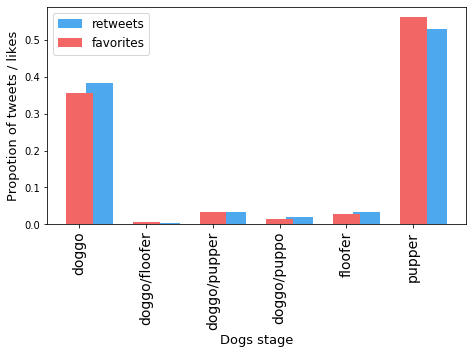

In [99]:
plt.figure(figsize=(7.5,4))

pos = np.arange(len(groupby_stage.index[1:]))

# taking the proption will give us a better result of the distribution of the data
plt.bar(pos+0.3,groupby_stage.retweets.values[1:]/np.sum(groupby_stage.retweets.values[1:]), color='#4ea8ed',width=0.4, label='retweets')
plt.bar(pos,groupby_stage.favorites.values[1:]/np.sum(groupby_stage.favorites.values[1:]), 
        color='#f26666',width=0.4, label="favorites")


plt.xticks(rotation='vertical',fontsize=13)
plt.xticks(pos,groupby_stage.index[1:],fontsize=14)
plt.ylabel('Propotion of tweets / likes',fontsize=13)
plt.xlabel('Dogs stage',fontsize=13)
plt.legend(fontsize=12)

plt.show();

#### What is the most popular dog prediction ?

In [100]:
# get all dogs breeds
dogs_type = df.p1.unique()
dogs_type = list(dogs_type)
for dog in df.p2.unique():
    if dog not in dogs_type:
        dogs_type.append(dog)

for dog in df.p3.unique():
    if dog not in dogs_type:
        dogs_type.append(dog)
        
dogs_type = pd.Series(dogs_type)

In [101]:
dic = df.p1.value_counts().to_dict()

In [102]:
p2_dic = df.p2.value_counts().to_dict()
p3_dic = df.p3.value_counts().to_dict()

In [103]:
for item in p2_dic.items():
    if item[0] in dic.keys():
        dic[item[0]] = dic[item[0]] + item[1]
    else:
        dic.update({item[0]:item[1]})

In [104]:
for item in p3_dic.items():
    if item[0] in dic.keys():
        dic[item[0]] = dic[item[0]] + item[1]
    else:
        dic.update({item[0]:item[1]})

In [105]:
# https://stackoverflow.com/questions/29216889/slicin
import itertools
dic = sorted(dic.items(), key=lambda x: x[1], reverse=True) #this will sort the dictionary based on the value.
dic = dict(dic) # sorted changed the dict to list.

In [106]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
top = dict(itertools.islice(dic.items(), 20)) # to slice the dictionary.
top

{'golden_retriever': 263,
 'Labrador_retriever': 263,
 'Chihuahua': 178,
 'Pembroke': 138,
 'Cardigan': 112,
 'Pomeranian': 102,
 'toy_poodle': 101,
 'pug': 92,
 'chow': 91,
 'French_bulldog': 89,
 'cocker_spaniel': 87,
 'Chesapeake_Bay_retriever': 85,
 'Eskimo_dog': 81,
 'Siberian_husky': 72,
 'beagle': 72,
 'kuvasz': 70,
 'malamute': 66,
 'Staffordshire_bullterrier': 64,
 'Samoyed': 63,
 'Pekinese': 62}

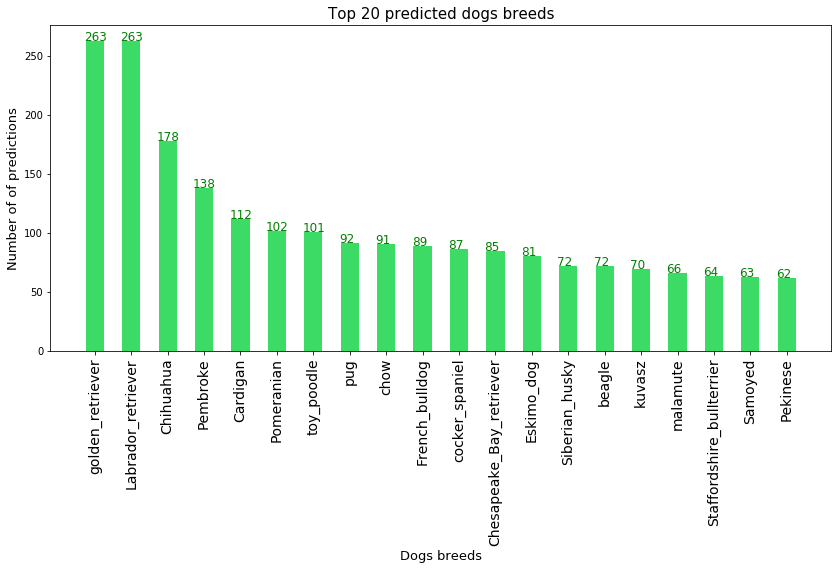

In [107]:
# visual the top actors/actress using matplotlib.
x = top.keys() 
y = top.values()


plt.figure(figsize=(14,6))
plt.bar(x,y,width=0.5,color='#3bdb66')

# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
for index,data in enumerate(y):
    plt.text(x=index-0.3 , y =data , s=f"{data}" , fontdict=dict(fontsize=12), color='green')
    
plt.xticks(rotation='vertical',fontsize=14)
plt.ylabel('Number of of predictions',fontsize=13)
plt.xlabel('Dogs breeds',fontsize=13)
plt.title('Top 20 predicted dogs breeds',fontsize=15);

#### Which dog breed is the most dominate ?
- We need to create a new column 'breed'.
- Deal with non-dog prediction.
- Taking the highest confidence out of the three predictions, to get the breed.

In [108]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweets,favorites,stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,5859,31825,None,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3866,23973,None,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8057,40307,None,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,8716,38504,None,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,2900,19365,None,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [109]:
# p1_conf is always better in orediction the breed. So the new columns will take the p1.
# 'at' function -> https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc
dogs = df.query('p1_dog == True | p3_dog == True | p2_dog == True')

for dog in range(dogs.shape[0]):
    if (dogs.iloc[dog].p1_dog == True) & (dogs.iloc[dog].p2_dog == True) & (dogs.iloc[dog].p3_dog == True):
        max_conf = np.max([dogs.iloc[dog].p1_conf,dogs.iloc[dog].p2_conf,dogs.iloc[dog].p3_conf])  
        if max_conf == dogs.iloc[dog].p1_conf:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p1
            dogs.at[dog,'breed'] = dogs.iloc[dog].p1
        elif max_conf == dogs.iloc[dog].p2_conf:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p2
            dogs.at[dog,'breed'] = dogs.iloc[dog].p2
        else:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p3
            dogs.at[dog,'breed'] = dogs.iloc[dog].p3
    
    elif (dogs.iloc[dog].p1_dog == True) & (dogs.iloc[dog].p2_dog == True) & (dogs.iloc[dog].p3_dog == False):
        max_conf = np.max([dogs.iloc[dog].p1_conf,dogs.iloc[dog].p2_conf])  
        if max_conf == dogs.iloc[dog].p1_conf:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p1
            dogs.at[dog,'breed'] = dogs.iloc[dog].p1
        else:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p2
            dogs.at[dog,'breed'] = dogs.iloc[dog].p2
            
    elif (dogs.iloc[dog].p1_dog == True) & (dogs.iloc[dog].p2_dog == False) & (dogs.iloc[dog].p3_dog == True):
        max_conf = np.max([dogs.iloc[dog].p1_conf,dogs.iloc[dog].p3_conf])  
        if max_conf == dogs.iloc[dog].p1_conf:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p1
            dogs.at[dog,'breed'] = dogs.iloc[dog].p1
        else:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p3
            dogs.at[dog,'breed'] = dogs.iloc[dog].p3
    
    elif (dogs.iloc[dog].p1_dog == True) & (dogs.iloc[dog].p2_dog == False) & (dogs.iloc[dog].p3_dog == False):
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p1
            dogs.at[dog,'breed'] = dogs.iloc[dog].p1
            
    elif (dogs.iloc[dog].p1_dog == False) & (dogs.iloc[dog].p2_dog == True) & (dogs.iloc[dog].p3_dog == True):
        max_conf = np.max([dogs.iloc[dog].p2_conf,dogs.iloc[dog].p3_conf])  
        if max_conf == dogs.iloc[dog].p2_conf:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p2
            dogs.at[dog,'breed'] = dogs.iloc[dog].p2
        else:
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p3
            dogs.at[dog,'breed'] = dogs.iloc[dog].p3
            
    elif (dogs.iloc[dog].p1_dog == False) & (dogs.iloc[dog].p2_dog == True) & (dogs.iloc[dog].p3_dog == False):
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p2
            dogs.at[dog,'breed'] = dogs.iloc[dog].p2
            
    elif (dogs.iloc[dog].p1_dog == False) & (dogs.iloc[dog].p2_dog == False) & (dogs.iloc[dog].p3_dog == True):
            #dogs.iloc[dog].breed =  dogs.iloc[dog].p3
            dogs.at[dog,'breed'] = dogs.iloc[dog].p3

In [110]:
# checking
dogs[dogs.breed == '']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweets,favorites,stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed


In [111]:
dogs.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweets,favorites,stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,5859,31825,None,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,3866,23973,None,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua


In [112]:
breed = dogs.groupby('breed')

In [113]:
sum_retweets = np.sum(breed.sum().retweets)
sum_retweets

4274704.0

In [114]:
breeds_retweets = breed.sum().retweets.sort_values(ascending=False)

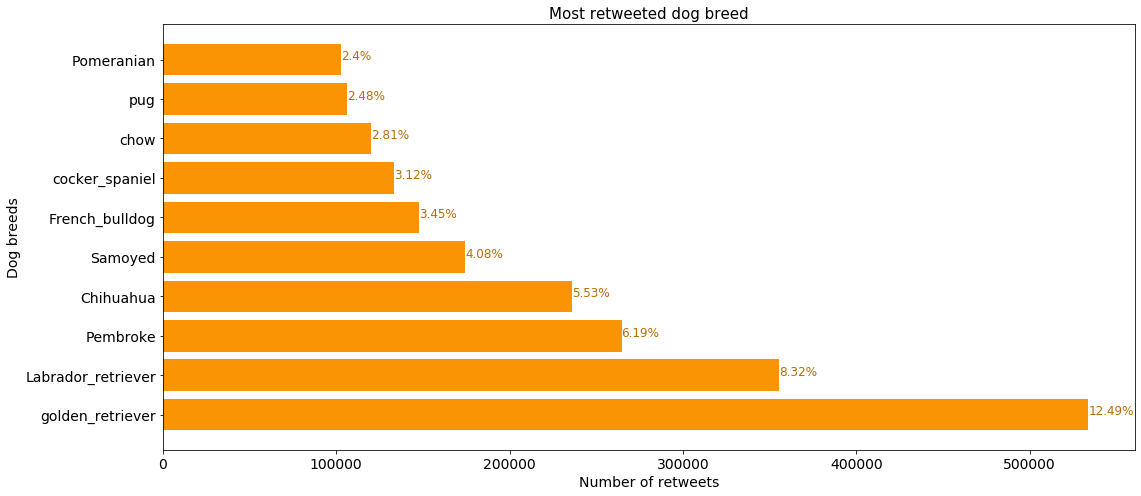

In [115]:
# visual the top actors/actress using matplotlib.
x = breeds_retweets.index[:10] 
y = breeds_retweets[:10] 

plt.figure(figsize=(16,7))
plt.barh(x,y,color='#fa9405')

# https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
for index,data in enumerate(y):
    #get propotion, to show each breed what it repersent in percentage form out of all retweets in 'dogs' datafeame
    prop = round((data / sum_retweets)*100,2) 
    plt.text(y=index, x=data , s=f"{prop}%" , fontdict=dict(fontsize=12), color='#b86d06')
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of retweets',fontsize=14)
plt.ylabel('Dog breeds',fontsize=14)
plt.title('Most retweeted dog breed',fontsize=15)
plt.tight_layout()
plt.show();